In [2]:
import pandas as pd

df = pd.read_csv('./data/PokemonStats.csv',)
df.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

In [3]:
df.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


# Q1

In [4]:
import sqlite3

# Create an SQLite database in memory and store the DataFrame
conn = sqlite3.connect(":memory:")
df.to_sql("pokemon", conn, index=False, if_exists="replace")

query = """
SELECT *
FROM (
    SELECT Type_1, Number, Name, Total,
           RANK() OVER (PARTITION BY Type_1 ORDER BY Total DESC) AS rank
    FROM pokemon
)
WHERE rank <= 3
ORDER BY Type_1, rank;
"""

result = pd.read_sql_query(query, conn)
result.to_csv('./data/result.csv')
result

,Type_1,Number,Name,Total,rank
0,Bug,649,Genesect,600,1
1,Bug,637,Volcarona,550,2
2,Bug,469,Yanmega,515,3
3,Dark,717,Yveltal,680,1
4,Dark,491,Darkrai,600,2
...,...,...,...,...,...
56,Steel,376,Metagross,600,2
57,Steel,385,Jirachi,600,2
58,Water,484,Palkia,680,1
59,Water,382,Kyogre,670,2


# Q2
## Part 1: Strongest attacker

In [5]:
df.Type_1.unique(), df.Type_1.nunique()

(array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
        'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
        'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object),
 18)

In [6]:
all_types = df.Type_1.unique()
all_types

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [7]:
# Resource: https://www.kaggle.com/datasets/jadenbailey/pokemon-type-chart
type_df = pd.read_csv('./data/typing_chart.csv')
type_df.fillna(1.0, inplace=True)
type_df.set_index("Attacker", inplace=True)
type_df

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
Attacker,,,,,,,,,,,,,,,,,,
Normal,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,1.0,1.0,0.5,1.0
Fire,1.0,0.5,0.5,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.5,1.0,0.5,1.0,2.0,1.0
Water,1.0,2.0,0.5,1.0,0.5,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,1.0,1.0
Electric,1.0,1.0,2.0,0.5,0.5,1.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0
Grass,1.0,0.5,2.0,1.0,0.5,1.0,1.0,0.5,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,0.5,1.0
Ice,1.0,0.5,0.5,1.0,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0
Fighting,2.0,1.0,1.0,1.0,1.0,2.0,1.0,0.5,1.0,0.5,0.5,0.5,2.0,0.0,1.0,2.0,2.0,0.5
Poison,1.0,1.0,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0
Ground,1.0,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,2.0,1.0


In [8]:
scores = {}
for t in all_types:
    scores[t] = sum([type_df.loc[t, t_] for t_ in all_types])
    
scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True))
scores

{'Ground': 21.0,
 'Fire': 20.0,
 'Ice': 20.0,
 'Water': 19.5,
 'Fairy': 19.5,
 'Fighting': 19.5,
 'Flying': 19.5,
 'Rock': 19.0,
 'Steel': 19.0,
 'Ghost': 18.5,
 'Dark': 18.5,
 'Psychic': 18.0,
 'Grass': 17.5,
 'Bug': 17.5,
 'Electric': 17.5,
 'Dragon': 17.5,
 'Poison': 17.0,
 'Normal': 16.0}

/var/folders/6m/x032bzms74b2t_sjzllbwgwc0000gn/T/ipykernel_71677/1370063751.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=df, palette='coolwarm')


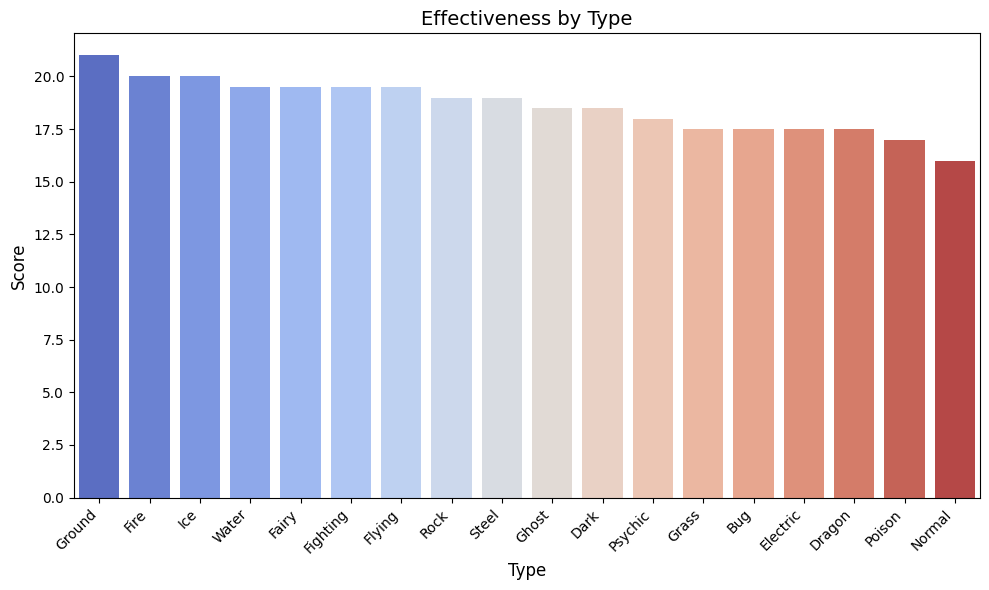

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_df(df, x, y, title):
    # Create the bar plot
    plt.figure(figsize=(10, 6))

    sns.barplot(x=x, y=y, data=df, palette='coolwarm')
    # Customize the plot
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45, ha='right')

    # Show the plot
    plt.tight_layout()
    plt.show()

scores_df = pd.DataFrame(list(scores.items()), columns=['Type', 'Score'])
plot_df(scores_df, 'Type', 'Score', 'Effectiveness by Type')

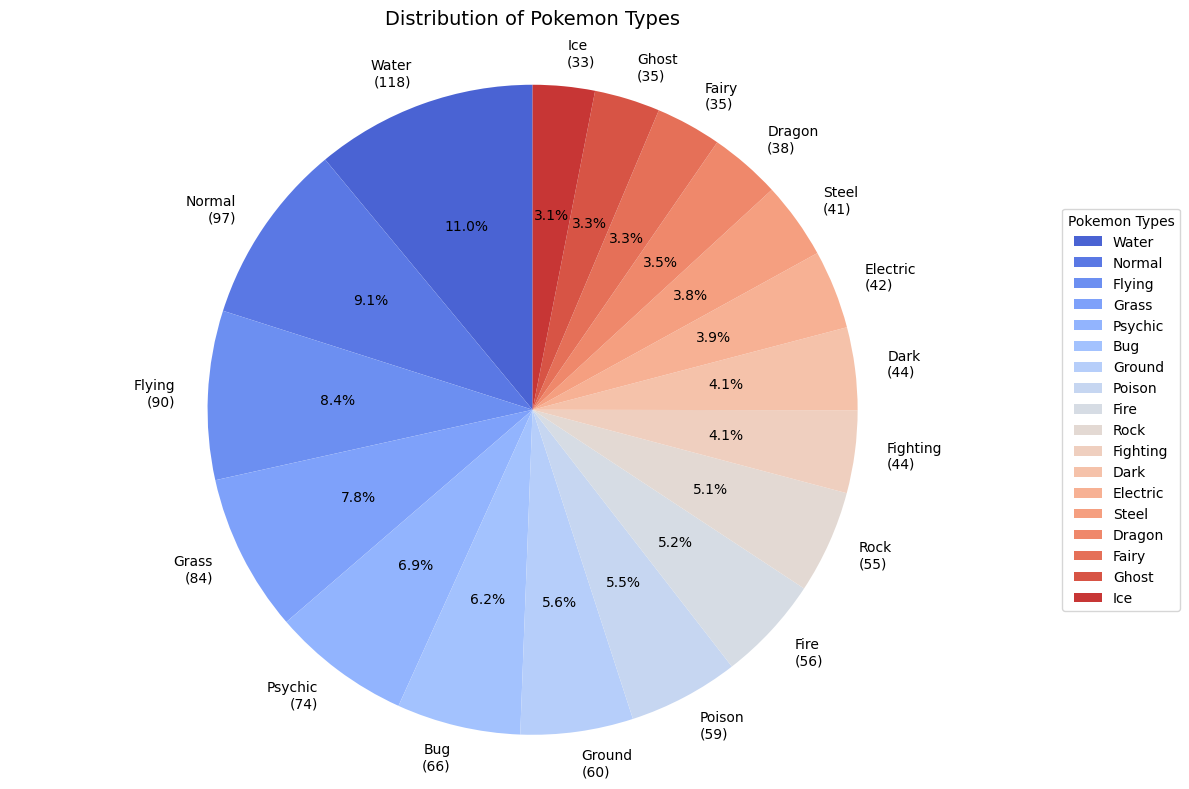

In [21]:
pokemon_count = {
    t: 0
    for t in all_types
}
for i in df.index:
    pokemon_count[df.loc[i, 'Type_1']] += 1
    if not pd.isna(t := df.loc[i, 'Type_2']):
        pokemon_count[df.loc[i, 'Type_2']] += 1

pokemon_count = dict(sorted(pokemon_count.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(12, 8))

# Create pie chart
plt.pie(pokemon_count.values(), 
        labels=[f'{type}\n({count})' for type, count in pokemon_count.items()],
        colors=sns.color_palette('coolwarm', n_colors=len(pokemon_count)),
        autopct='%1.1f%%',
        startangle=90)

# Add title
plt.title('Distribution of Pokemon Types', pad=20, size=14)

# Add legend on the right side
plt.legend(pokemon_count.keys(), 
          title='Pokemon Types',
          loc='center left',
          bbox_to_anchor=(1, 0, 0.5, 1))

# Ensure the pie chart is circular
plt.axis('equal')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


In [22]:
pokemon_count

{'Water': 118,
 'Normal': 97,
 'Flying': 90,
 'Grass': 84,
 'Psychic': 74,
 'Bug': 66,
 'Ground': 60,
 'Poison': 59,
 'Fire': 56,
 'Rock': 55,
 'Fighting': 44,
 'Dark': 44,
 'Electric': 42,
 'Steel': 41,
 'Dragon': 38,
 'Fairy': 35,
 'Ghost': 35,
 'Ice': 33}

In [ ]:
# Change count to ratio
total = sum(pokemon_count.values())

for k, v in pokemon_count.items():
    pokemon_count[k] = pokemon_count[k] / total

pokemon_count

{'Water': 0.11017740429505135,
 'Normal': 0.09056956115779645,
 'Flying': 0.08403361344537816,
 'Grass': 0.0784313725490196,
 'Psychic': 0.06909430438842204,
 'Bug': 0.06162464985994398,
 'Ground': 0.056022408963585436,
 'Poison': 0.055088702147525676,
 'Fire': 0.05228758169934641,
 'Rock': 0.051353874883286646,
 'Fighting': 0.04108309990662932,
 'Dark': 0.04108309990662932,
 'Electric': 0.0392156862745098,
 'Steel': 0.03828197945845005,
 'Dragon': 0.035480859010270774,
 'Fairy': 0.032679738562091505,
 'Ghost': 0.032679738562091505,
 'Ice': 0.03081232492997199}

/var/folders/6m/x032bzms74b2t_sjzllbwgwc0000gn/T/ipykernel_71677/1370063751.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=df, palette='coolwarm')


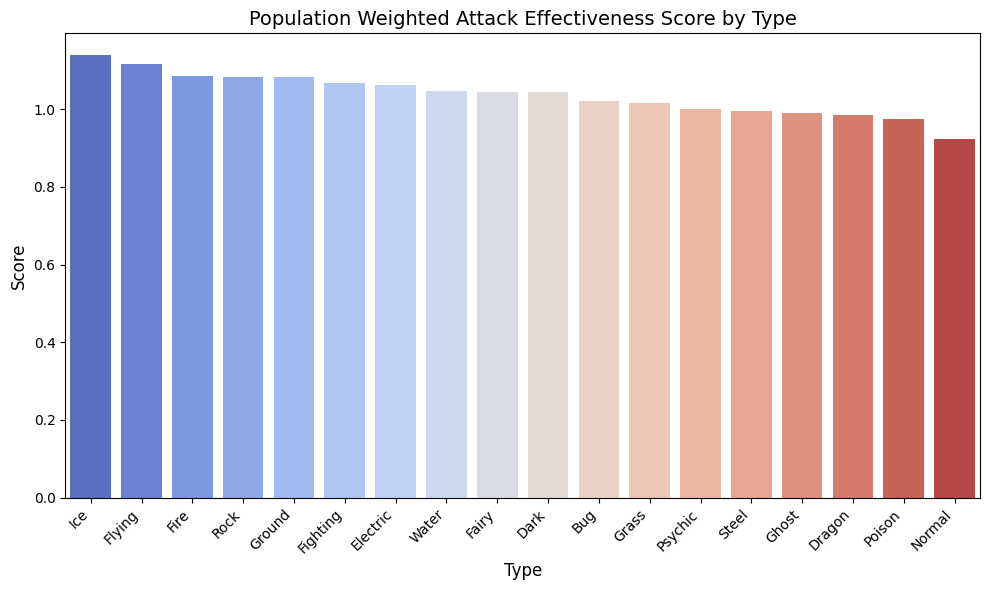

In [ ]:
weighted_attack_scores = {}
for t in all_types:
    weighted_attack_scores[t] = sum([type_df.loc[t, t_] * pokemon_count[t_]  for t_ in all_types])

weighted_attack_scores = dict(sorted(weighted_attack_scores.items(), key=lambda x: x[1], reverse=True))

weighted_attack_scores_df = pd.DataFrame(list(weighted_attack_scores.items()), columns=['Type', 'Score'])
plot_df(weighted_attack_scores_df, 'Type', 'Score', 'Population Weighted Attack Effectiveness Score by Type')

## Part 2: Strongest defender

/var/folders/6m/x032bzms74b2t_sjzllbwgwc0000gn/T/ipykernel_71677/1370063751.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, data=df, palette='coolwarm')


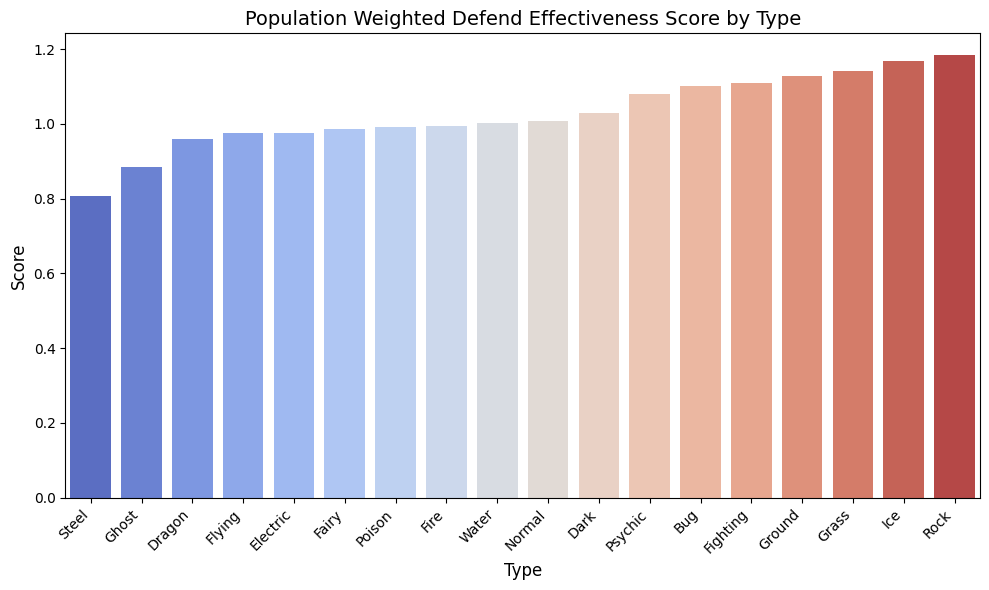

In [26]:
weighted_defend_scores = {}
for t in all_types:
    weighted_defend_scores[t] = sum([type_df.loc[t_, t] * pokemon_count[t_] for t_ in all_types])

weighted_defend_scores = dict(sorted(weighted_defend_scores.items(), key=lambda x: x[1], reverse=False))

weighted_defend_scores_df = pd.DataFrame(list(weighted_defend_scores.items()), columns=['Type', 'Score'])
plot_df(weighted_defend_scores_df, 'Type', 'Score', 'Population Weighted Defend Effectiveness Score by Type')

## Part 3 stats

In [95]:
# Prepare to split data by both Type_1 and Type_2, as each Pokemon may have multiple types
type_columns = ['Type_1', 'Type_2']
type_data = pd.melt(df, id_vars=['Number', 'Name', 'Total', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'isLegendary', 'hasMegaEvolution'],
                    value_vars=type_columns, var_name='Type_Type', value_name='Type')

# Grouping by Type and calculating averages and counts
result = type_data.groupby('Type').agg(
    Total_avg=('Total', 'mean'),
    HP_avg=('HP', 'mean'),
    Attack_avg=('Attack', 'mean'),
    Defense_avg=('Defense', 'mean'),
    Sp_Atk_avg=('Sp_Atk', 'mean'),
    Sp_Def_avg=('Sp_Def', 'mean'),
    Speed_avg=('Speed', 'mean'),
    isLegendary_count=('isLegendary', 'sum'),
    hasMegaEvolution_count=('hasMegaEvolution', 'sum')
).reset_index()

# Counting the number of Pokémon for each type
pokemon_count = type_data.groupby('Type')['Number'].count().reset_index(name='Pokemon_count')

# Merging the pokemon count with the previous results
result = result.merge(pokemon_count, on='Type')

# Calculating the legendary and mega ratios
result['Legendary_ratio'] = result['isLegendary_count'] / result['Pokemon_count'] * 100
result['Mega_ratio'] = result['hasMegaEvolution_count'] / result['Pokemon_count'] * 100

# Reorganizing the columns to show the updated results
result = result[['Type', 'Total_avg', 'HP_avg', 'Attack_avg', 'Defense_avg', 'Sp_Atk_avg', 'Sp_Def_avg', 'Speed_avg', 'Legendary_ratio', 'Mega_ratio']]

result = result.sort_values(by='Total_avg', ascending=False).reset_index(drop=True)
result

,Type,Total_avg,HP_avg,Attack_avg,Defense_avg,Sp_Atk_avg,Sp_Def_avg,Speed_avg,Legendary_ratio,Mega_ratio
0,Dragon,499.052632,78.000000,98.105263,80.394737,84.526316,81.447368,76.578947,26.315789,15.789474
1,Steel,469.609756,64.585366,85.634146,112.341463,69.121951,82.439024,55.487805,12.195122,14.634146
2,Fire,446.553571,68.821429,80.428571,65.267857,86.660714,71.071429,74.303571,12.500000,7.142857
3,Ice,444.515152,76.303030,76.090909,73.666667,76.090909,76.848485,65.515152,9.090909,6.060606
4,Psychic,444.135135,70.297297,64.391892,70.121622,86.594595,82.608108,70.121622,14.864865,12.162162
5,Fighting,440.750000,73.454545,96.954545,70.181818,60.863636,69.795455,69.500000,6.818182,11.363636
6,Dark,438.204545,69.250000,90.727273,67.136364,71.931818,64.590909,74.568182,4.545455,11.363636
7,Rock,437.000000,65.436364,87.327273,106.654545,57.781818,71.927273,47.872727,5.454545,7.272727
8,Flying,433.877778,70.055556,75.400000,65.288889,71.100000,68.833333,83.200000,11.111111,7.777778
9,Electric,425.642857,63.595238,68.476190,60.404762,82.809524,68.547619,81.809524,9.523810,4.761905


/var/folders/6m/x032bzms74b2t_sjzllbwgwc0000gn/T/ipykernel_62593/1684673248.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/6m/x032bzms74b2t_sjzllbwgwc0000gn/T/ipykernel_62593/1684673248.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/6m/x032bzms74b2t_sjzllbwgwc0000gn/T/ipykernel_62593/1684673248.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/6m/x032bzms74b2t_sjzllbwgwc0000gn/T/ipykernel_62593/1684673248.py:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

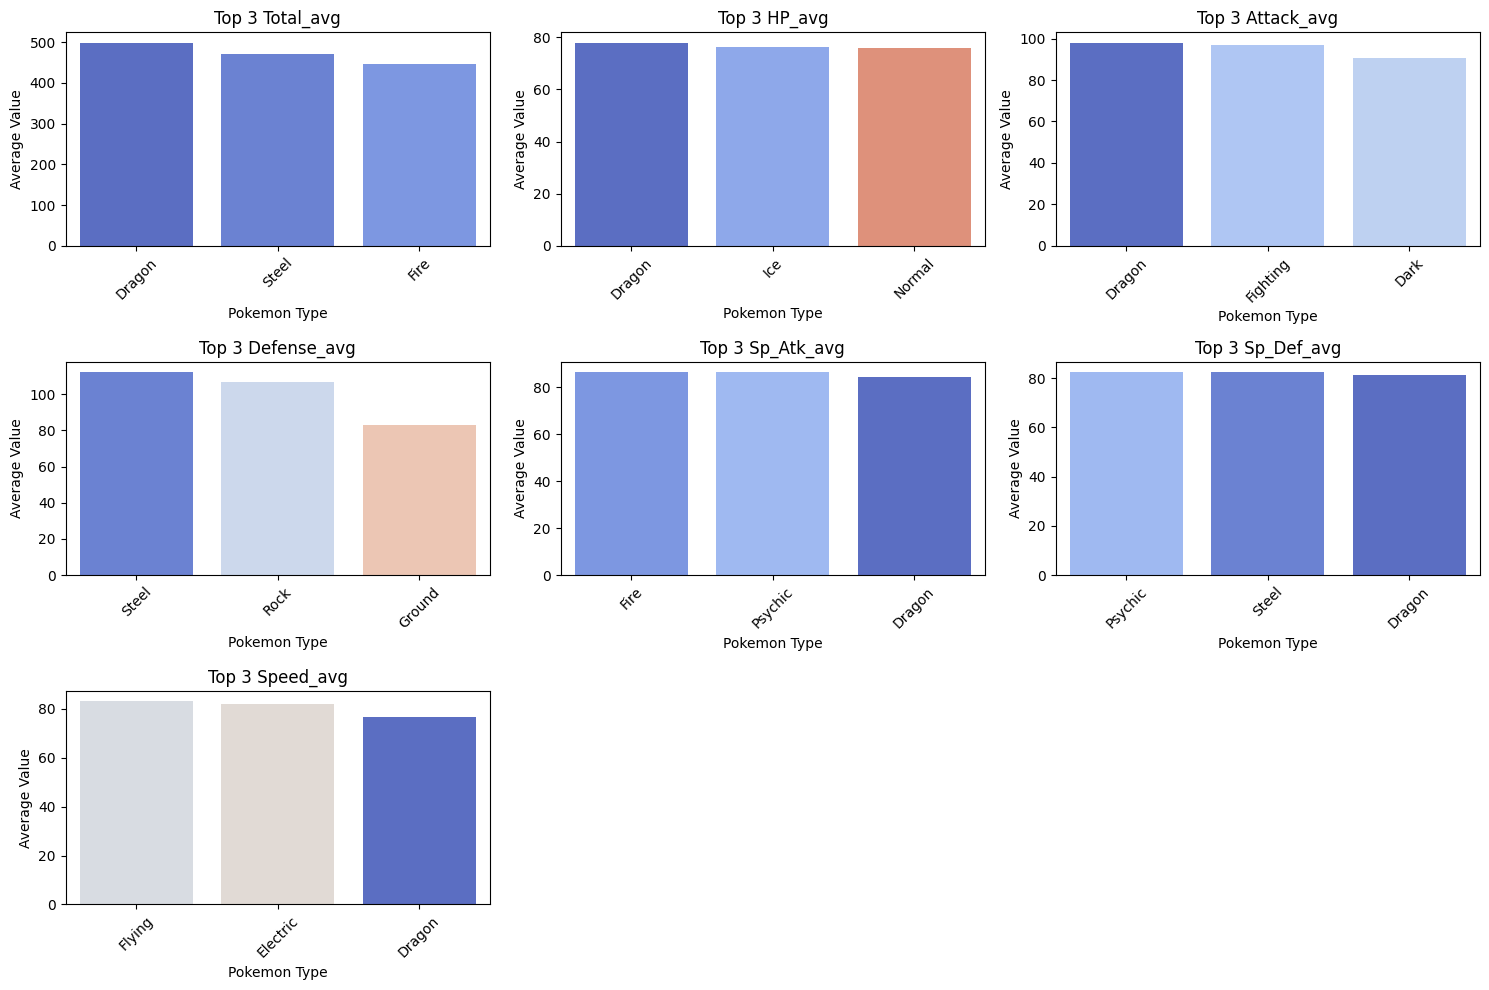

In [94]:
coolwarm_colors = sns.color_palette('coolwarm', len(result['Type']))

# Create a dictionary to map each Pokemon type to a unique color
type_to_color = dict(zip(result['Type'], coolwarm_colors))

cols = ['Total_avg', 'HP_avg', 'Attack_avg', 'Defense_avg', 'Sp_Atk_avg', 'Sp_Def_avg', 'Speed_avg', ]

# Find the top 3 types for each column
top_3_types = {}
for col in cols:
    top_3_types[col] = result.nlargest(3, col)[['Type', col]]

# Plot the data
plt.figure(figsize=(15, 10))

for idx, col in enumerate(cols):
    plt.subplot(3, 3, idx + 1)
    
    # Sort the values by the column and plot the top 3 types for each stat
    top_3 = result.nlargest(3, col)[['Type', col]]
    
    # Create a color list for the 'Type' column by mapping the type to its color
    color_list = [type_to_color[type] for type in top_3['Type']]
    
    # Plot the barplot using the color_list
    sns.barplot(x='Type', y=col, data=top_3, palette=color_list)
    
    # Set plot title and labels
    plt.title(f'Top 3 {col}')
    plt.xlabel('Pokemon Type')
    plt.ylabel('Average Value')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



## Part 4: Special abilities (legendary, mega evolution)

In [96]:
result[['Type', 'Legendary_ratio', 'Mega_ratio']]

,Type,Legendary_ratio,Mega_ratio
0,Dragon,26.315789,15.789474
1,Steel,12.195122,14.634146
2,Fire,12.500000,7.142857
3,Ice,9.090909,6.060606
4,Psychic,14.864865,12.162162
5,Fighting,6.818182,11.363636
6,Dark,4.545455,11.363636
7,Rock,5.454545,7.272727
8,Flying,11.111111,7.777778
9,Electric,9.523810,4.761905


/var/folders/6m/x032bzms74b2t_sjzllbwgwc0000gn/T/ipykernel_62593/3870596434.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




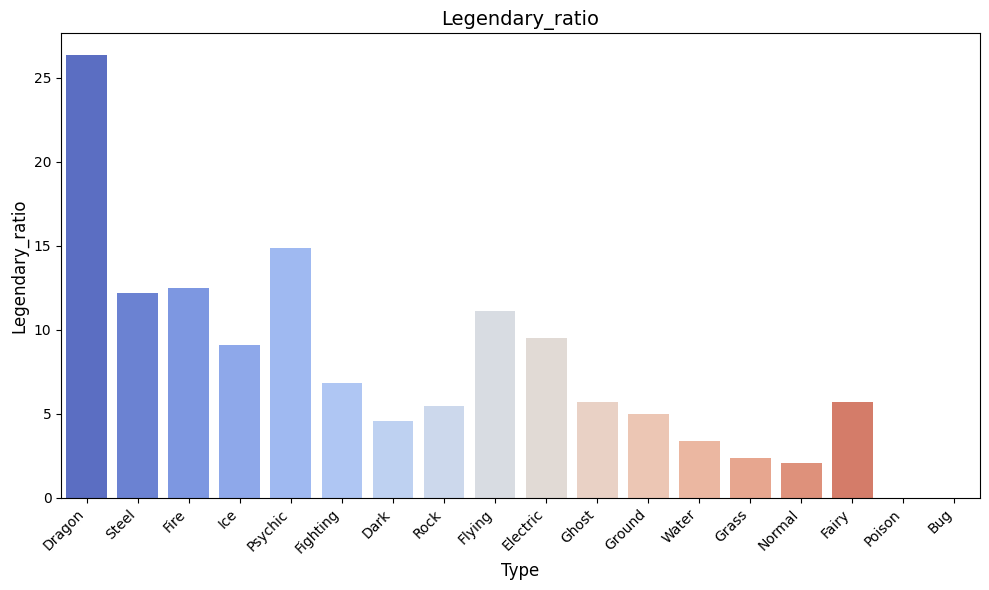

/var/folders/6m/x032bzms74b2t_sjzllbwgwc0000gn/T/ipykernel_62593/3870596434.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




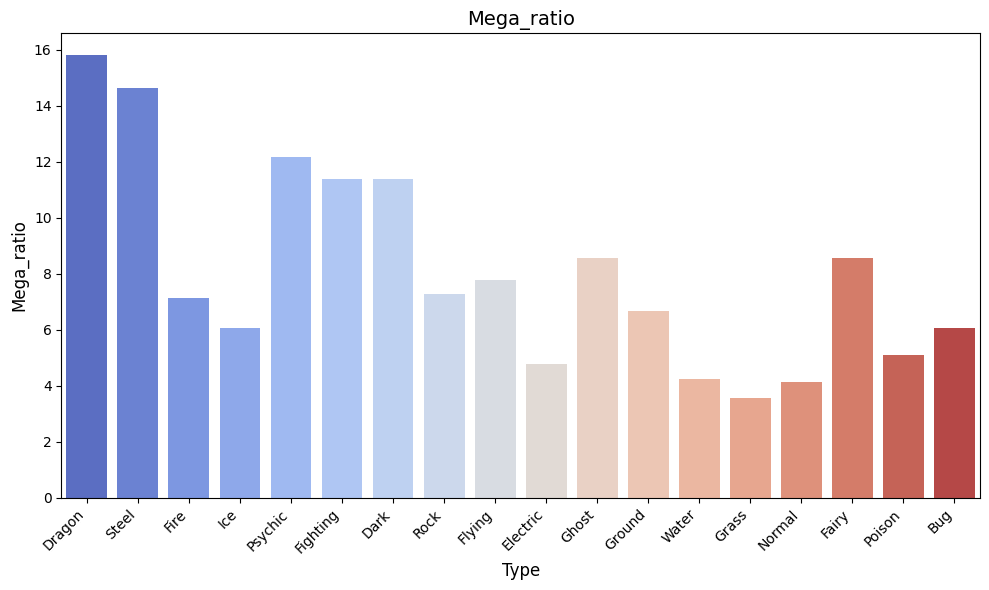

In [97]:
for col in ['Legendary_ratio', 'Mega_ratio']:
    plot_df(result, 'Type', col, col)

In [98]:
import scipy.stats as stats


legendary_pokemon = df[df['isLegendary'] == True]['Total']
non_legendary_pokemon = df[df['isLegendary'] == False]['Total']

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(legendary_pokemon, non_legendary_pokemon)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the Total stats between legendary and non-legendary Pokémon.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the Total stats between legendary and non-legendary Pokémon.")

T-statistic: 14.744544690003888
P-value: 3.4829641059515116e-43
Reject the null hypothesis: There is a significant difference in the Total stats between legendary and non-legendary Pokémon.


In [99]:

# Convert 'isLegendary' to numeric: True -> 1, False -> 0
df['isLegendary_numeric'] = df['isLegendary'].astype(int)

# Compute Pearson correlation coefficient
correlation = df['Total'].corr(df['isLegendary_numeric'])

print(f"Pearson Correlation Coefficient: {correlation}")

Pearson Correlation Coefficient: 0.48183716291430523


In [100]:

# Convert 'isLegendary' to numeric: True -> 1, False -> 0
df['mega_numeric'] = df['hasMegaEvolution'].astype(int)

# Compute Pearson correlation coefficient
correlation = df['Total'].corr(df['mega_numeric'])

print(f"Pearson Correlation Coefficient: {correlation}")

Pearson Correlation Coefficient: 0.22850271317679793
